<a href="https://colab.research.google.com/github/yaraamrsalah/Machine-learning/blob/main/multinomial_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Selected-Project/log2.csv'
dataset = pd.read_csv(dataset_path)

In [4]:
dataset = pd.read_csv(dataset_path)


# Converting target values to numbers
Action = {'drop':0, 'allow': 1,'deny':2, 'reset-both':3}
dataset.Action = [Action[item] for item in dataset.Action]
target = dataset.Action

In [5]:
target.value_counts()


1    37640
2    14987
0    12851
3       54
Name: Action, dtype: int64

In [6]:
# Removing spaces from dataset column headers
dataset.columns = dataset.columns.str.replace(' ', '')

In [7]:
dataset.head()

,SourcePort,DestinationPort,NATSourcePort,NATDestinationPort,Action,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime(sec),pkts_sent,pkts_received
0,57222,53,54587,53,1,177,94,83,2,30,1,1
1,56258,3389,56258,3389,1,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,1,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,1,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,1,25358,6778,18580,31,16,13,18


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
feature_columns = ['SourcePort', 'DestinationPort', 'NATSourcePort', 'NATDestinationPort', 'Bytes', 'BytesSent', 'BytesReceived', 'Packets', 'ElapsedTime(sec)', 'pkts_sent', 'pkts_received']
features = dataset[feature_columns]

In [10]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=1)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(target.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65532,)
(52425, 11)
(13107, 11)
(52425,)
(13107,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [14]:
# Create the logistic regression model
lr_model = LogisticRegression(multi_class='multinomial',solver ='newton-cg', max_iter=10000)

# fit the model with training set
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial',
                   solver='newton-cg')

In [15]:
# Predicting the test set results
y_predict = lr_model.predict(X_test)

In [27]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

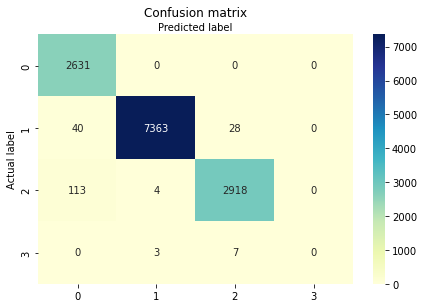

In [30]:
# Creating and visualizing the confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# Calculating the accuracy
accuracy = metrics.accuracy_score(y_test, y_predict) * 100
print("Accuracy = ", accuracy)

Accuracy =  98.5122453650721


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2631
           1       1.00      0.99      0.99      7431
           2       0.99      0.96      0.97      3035
           3       0.00      0.00      0.00        10

    accuracy                           0.99     13107
   macro avg       0.73      0.74      0.74     13107
weighted avg       0.98      0.99      0.98     13107



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
